In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [39]:
import librosa
import jams
import numpy as np

from pathlib import Path

import exp.runutils

In [37]:
jamFolder=Path('/scratch/enis/data/nna/labeling/splitsJams')
sourcePath=Path('/scratch/enis/data/nna/labeling/splits')


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [ ]:
humanresults=exp.runUtils.loadLabels(labelsbyhumanpath)

PosixPath('/scratch/enis/data/nna/labeling/splits')

In [ ]:
for f in humanresults:
    # f="NIGLIQ2_20160702_002037_1368m_33s__1368m_43s.mp3"
    f=Path(f)
    fileStem=f.stem

    # Load the audio file
    infile=sourcePath/f
    y, sr = librosa.load(str(infile))

    # Compute the track duration
    track_duration = librosa.get_duration(y=y, sr=sr)


    tags4file=humanresults[str(f)]

    # Construct a new JAMS object and annotation records
    jam = jams.JAMS()

    # Store the track duration
    jam.file_metadata.duration = track_duration

    beat_a = jams.Annotation(namespace='tag_open')
    beat_a.annotation_metadata = jams.AnnotationMetadata(data_source='me@enisberk.com')

    # Add beat timings to the annotation record.
    # The beat namespace does not require value or confidence fields,
    # so we can leave those blank.
    for aTag in tags4file:
        beat_a.append(time=0, duration=track_duration,value=aTag)

    # Store the new annotation in the jam
    jam.annotations.append(beat_a)

    # Save to disk
    jam.save(str(jamFolder/ (fileStem+".jams")))


In [53]:
jamFile=str(jamFolder/ (fileStem+".jams"))
audioFile=sourcePath/f

In [55]:
import muda
j_orig = muda.load_jam_audio(str(jamFile), str(audioFile))

# j_orig = muda.jam_pack(existing_jams, _audio=dict(y=y, sr=sr))

/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [56]:
pitch = muda.deformers.LinearPitchShift(n_samples=5, lower=-1, upper=1)


In [43]:
jams_out=list(pitch.transform(j_orig))
    

NameError: name 'pitch' is not defined

In [ ]:
# switch to librosa:


In [2]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt


In [3]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

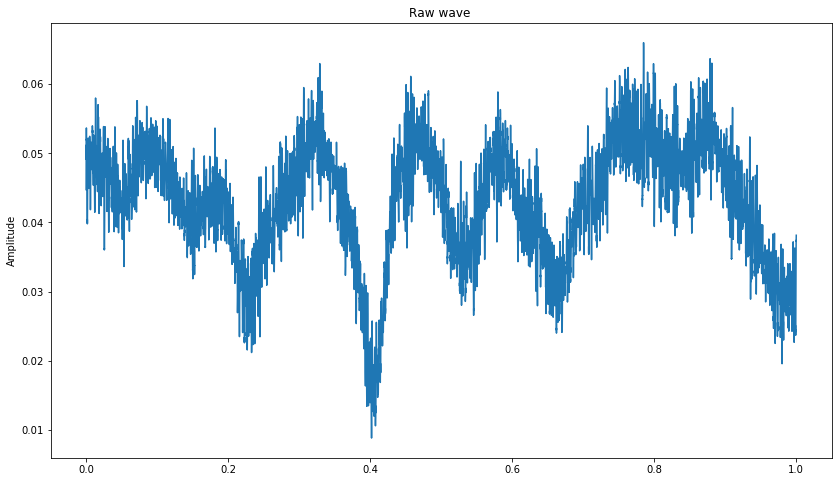

In [4]:
data = load_audio_file("output2000.flac")
plot_time_series(data)

In [7]:
ipd.Audio(data, rate=16000)


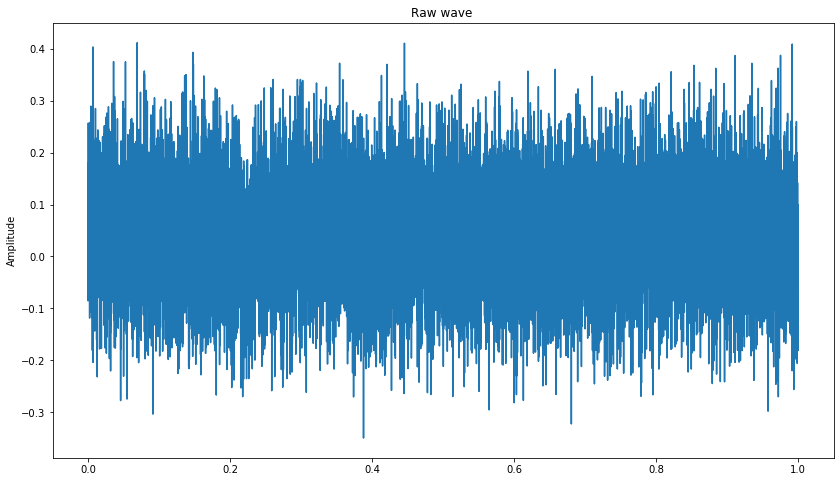

In [35]:
def addNoise(data, noise_factor):
    noise = np.random.randn(len(data))
    noise = (noise_factor * noise).astype(data.dtype)
    augmented_data = data + noise
    # Cast back to same data type
    return augmented_data

noise_factor=0.1

data_wn=addNoise(data, noise_factor)
plot_time_series(data_wn)
ipd.Audio(data_wn, rate=16000)


In [ ]:
# # stretching the sound
# def stretch(data, rate=1):
#     input_length = 16000
#     data = librosa.effects.time_stretch(data, rate)
#     if len(data)>input_length:
#         data = data[:input_length]
#     else:
#         data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

#     return data


# data_stretch =stretch(data, 0.8)
# print("This makes the sound deeper but we can still hear 'off' ")
# plot_time_series(data_stretch)
# ipd.Audio(data_stretch, rate=16000)

# data_stretch =stretch(data, 1.2)
# print("Higher frequencies  ")
# plot_time_series(data_stretch)
# ipd.Audio(data_stretch, rate=16000)

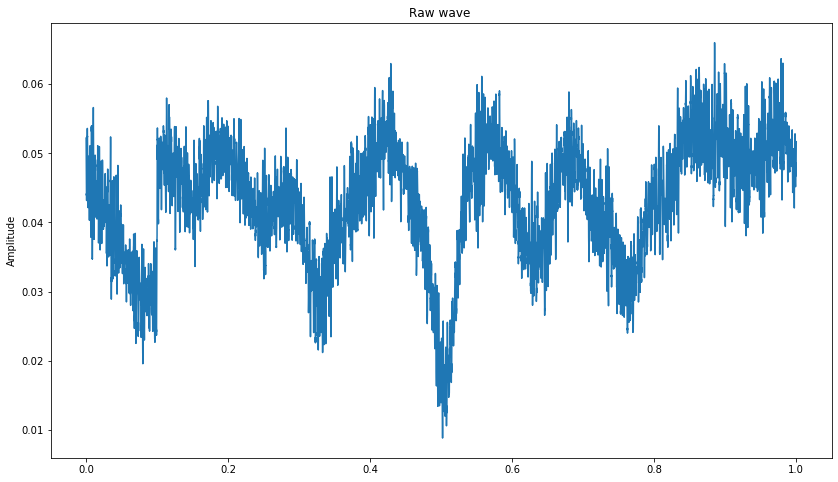

In [8]:

# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear 'off' 


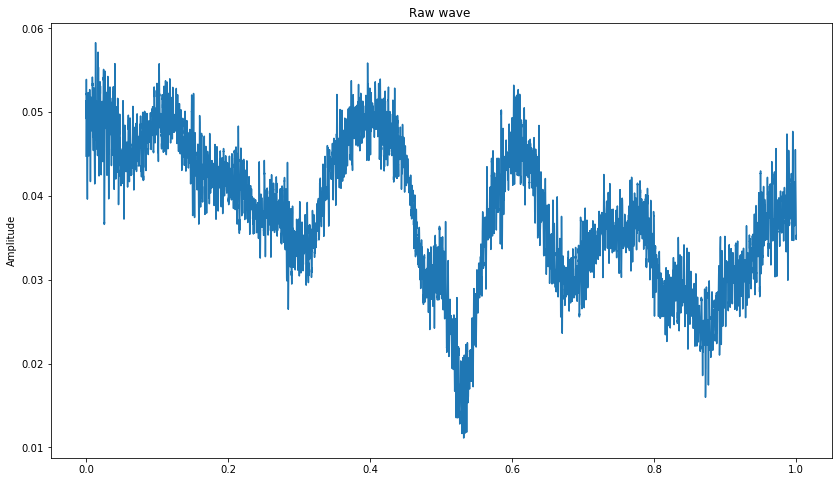

In [10]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear 'off' ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)


Higher frequencies  


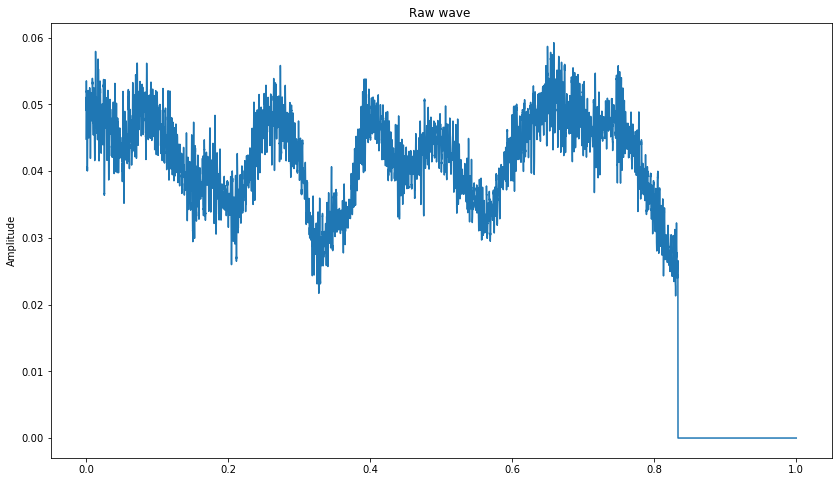

In [37]:

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

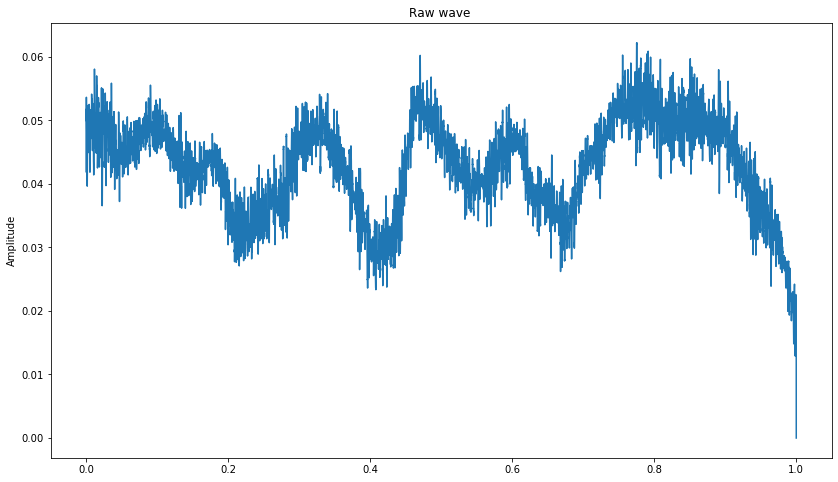

In [18]:
data_shift = librosa.effects.pitch_shift(data, 16000, 2.2)

plot_time_series(data_shift)
ipd.Audio(data_shift, rate=16000)


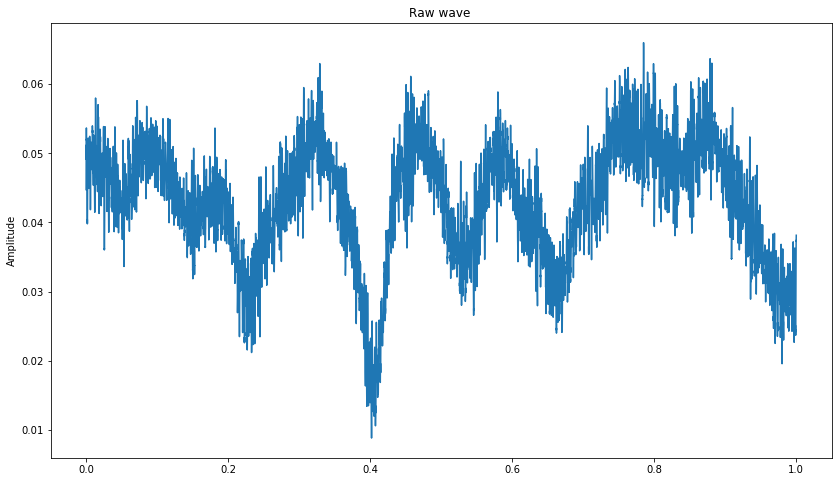

In [15]:
plot_time_series(data)


In [19]:
pitch_shift=4,-4
time_scretch=0.7,1.25  #0.81,0.93,1.07,1.23
bg_noise=0.001,0.1  #0.1,0.5
roll_rate=


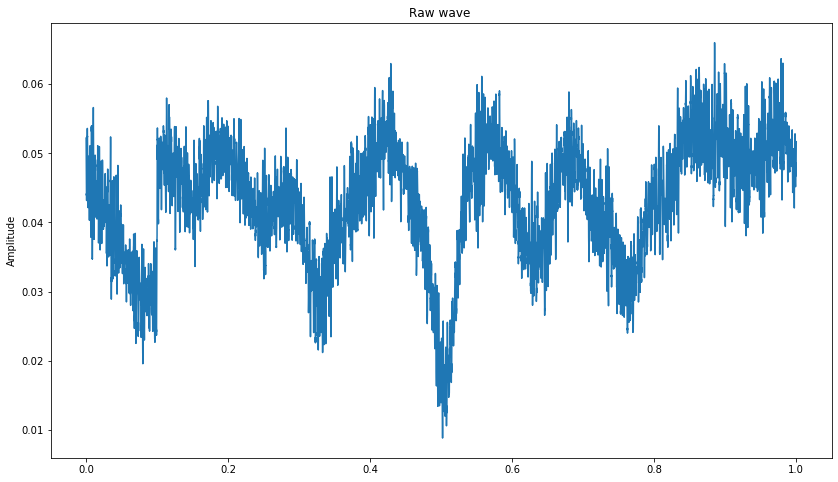

In [42]:

# stretching the sound
def time_stretch(data,output_length, sr=1):

    data = librosa.effects.time_stretch(data, sr)
    if len(data)>output_length:
        data = data[:output_length]
    else:
        data = np.pad(data, (0, max(0, output_length - len(data))), "constant")

    return data

def addNoise(data, noise_factor):
    noise = np.random.randn(len(data))
    noise = (noise_factor * noise).astype(data.dtype)
    augmented_data = data + noise
    # Cast back to same data type
    return augmented_data


pitch_shift_n_steps=2.2
time_stretch_factor=0.8
noise_factor=0.1
roll_rate=1.1

data_pitch_shift = librosa.effects.pitch_shift(data, sr, pitch_shift_n_steps)

data_time_stretch =time_stretch(data, time_stretch_factor)

data_wn=addNoise(data, noise_factor)

# Shifting the sound
data_roll = np.roll(data, int(len(data)*roll_rate))
plot_time_series(data_roll)


In [ ]:
#4 operations +1 

# experiment seperatly first, check # of augment and parameter
# Experiment with merging different good ones,
# experiment with doing some of them together


In [67]:
def time_stretch(data,output_length, time_stretch_factor):
    """

    """

    for index,y in enumerate(data):

        data_strech = librosa.effects.time_stretch(y.reshape(-1), time_stretch_factor)
        data_strech = data_strech.astype(data.dtype)

        if len(data_strech)>output_length:
            data_strech = data_strech[:output_length]
        else:
            data_strech = np.pad(data_strech, (0, max(0, output_length - len(data_strech))), "constant")

        data_strech=data_strech.reshape(y.shape)

        if index==0:
            data_strechAll = np.empty(data.shape,dtype=data.dtype)
        data_strechAll[index]=data_strech[:]

    return data_strechAll

def pitch_shift(data,sr, pitch_shift_n_steps):
    """

    """

    for index,y in enumerate(data):

        dataAug = librosa.effects.pitch_shift(y.reshape(-1), sr, pitch_shift_n_steps)
        dataAug = dataAug.astype(data.dtype)
        dataAug=dataAug.reshape(y.shape)

        if index==0:
            dataAugAll = np.empty(data.shape,dtype=data.dtype)
        dataAugAll[index]=dataAug[:]

    return dataAugAll

In [68]:
data=np.random.rand(*(13,10,44100))
data=data.astype(np.float32)
output_length=44100*10
# asd=time_stretch(data,output_length, 0.1)
asd=pitch_shift(data,44100, 2)

In [69]:
asd.shape

(13, 10, 44100)

In [70]:
data[1,:,:10]

array([[2.8828675e-01, 6.1568946e-01, 2.8922155e-01, 4.7187801e-02,
        7.8733295e-01, 9.9599069e-01, 5.5445042e-02, 5.6611609e-01,
        3.2461300e-01, 7.0603588e-04],
       [3.4039447e-01, 9.3633193e-01, 4.8983946e-01, 1.0730197e-01,
        3.9153042e-01, 8.8415608e-02, 9.4649029e-01, 6.2439644e-01,
        8.5716039e-01, 5.0964725e-01],
       [3.5628560e-01, 3.4242326e-01, 7.5409216e-01, 4.1841123e-01,
        6.0812593e-01, 5.7311114e-02, 5.3874964e-01, 3.5657993e-01,
        7.4204165e-01, 8.3169878e-01],
       [1.5143085e-01, 7.7481896e-02, 4.4062340e-01, 4.9608883e-01,
        1.2497862e-01, 4.1250956e-01, 1.9797771e-01, 4.1415045e-01,
        4.1450337e-02, 5.5767697e-01],
       [3.3380774e-01, 6.6803098e-01, 1.8115950e-01, 5.4649677e-02,
        1.8708156e-01, 1.3125685e-01, 4.9961686e-01, 8.3488733e-01,
        8.0406851e-01, 6.2679243e-01],
       [3.4913814e-01, 4.1307127e-01, 8.4111849e-03, 2.8591269e-01,
        2.0268960e-01, 3.4096003e-02, 9.7103560e-01, 4.46

In [71]:
asd[2,:,:10]

array([[0.30027565, 0.6564872 , 0.5689122 , 0.41553435, 0.22320862,
        0.5422585 , 0.77955914, 0.49245426, 0.73253715, 1.0245174 ],
       [0.7055393 , 0.3556353 , 0.62226254, 0.5379224 , 0.41437396,
        0.55677384, 0.44826093, 0.51972014, 0.33398312, 0.3275554 ],
       [0.6075049 , 0.5008007 , 0.43690315, 0.20050265, 0.5478342 ,
        0.7015086 , 0.6440085 , 0.77351624, 0.57962966, 0.47256646],
       [0.5397843 , 0.4688452 , 0.48905277, 0.5824305 , 0.30568424,
        0.28969994, 0.28257966, 0.5909037 , 0.4530809 , 0.46845603],
       [0.38202104, 0.5380417 , 0.23418751, 0.6625541 , 0.9086735 ,
        0.9026907 , 0.4083589 , 0.05951737, 0.7852635 , 0.45973808],
       [0.5649985 , 0.5388396 , 0.06565101, 0.72509784, 0.69750077,
        0.46444526, 0.45880952, 0.6290173 , 0.39092326, 0.52879137],
       [0.45094243, 0.63616794, 0.5379414 , 0.73170274, 0.5704404 ,
        0.64992267, 0.6353104 , 0.54835397, 0.84883964, 0.5952234 ],
       [0.51591873, 0.35453644, 0.5063208

In [6]:
import torch

import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [8]:
import exp.modelArchs


In [2]:
modelPath="/home/enis/projects/nna/src/exp/wandb/run-20200722_055604-2yqh4nns/best_model_84_ROC_AUC=0.7935.pt"

model = torch.load(modelPath)



AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [11]:

model = exp.modelArchs.NetCNN1(45,[128,850],(3,3)).float()
model.load_state_dict(torch.load(modelPath))
model.eval()

NetCNN1(
  (conv1): Conv2d(1, 45, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1224000, out_features=10, bias=True)
  (fc1_bn): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc2_bn): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc3_bn): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=10, out_features=8, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)

/home/enis/projects/nna/src


In [32]:
import requests

# https://api.telegram.org/bot195185562:AAGkiInJ75o-SwslVtK36cX5P3crx1Yhe3E/getUpdates
    
def telegram_bot_sendtext(bot_message,ChatID):
    
    bot_token = '195185562:AAGkiInJ75o-SwslVtK36cX5P3crx1Yhe3E'
    bot_chatID = str(ChatID)
    params = {'chat_id':bot_chatID,'parse_mode':"Markdown","text":bot_message}

    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage'
    response = requests.get(send_text,params=params)

    return response.json()
    

test = telegram_bot_sendtext("113133460",113133460)
print(test)

{'ok': True, 'result': {'message_id': 32, 'from': {'id': 195185562, 'is_bot': True, 'first_name': 'Application Logs', 'username': 'EnisBerkBot'}, 'chat': {'id': 113133460, 'first_name': 'Enis Berk', 'username': 'enisberk', 'type': 'private'}, 'date': 1596656978, 'text': '113133460'}}


In [31]:
for i in range(10):
    test = telegram_bot_sendtext("Testing Telegram bot",873234276)
    print(test)
    import time
    time.sleep(1)

{'ok': True, 'result': {'message_id': 29, 'from': {'id': 195185562, 'is_bot': True, 'first_name': 'Application Logs', 'username': 'EnisBerkBot'}, 'chat': {'id': 873234276, 'first_name': 'Elif Beyza', 'last_name': 'Çoban', 'type': 'private'}, 'date': 1596656853, 'text': 'Testing Telegram bot'}}
{'ok': True, 'result': {'message_id': 30, 'from': {'id': 195185562, 'is_bot': True, 'first_name': 'Application Logs', 'username': 'EnisBerkBot'}, 'chat': {'id': 873234276, 'first_name': 'Elif Beyza', 'last_name': 'Çoban', 'type': 'private'}, 'date': 1596656854, 'text': 'Testing Telegram bot'}}
{'ok': True, 'result': {'message_id': 31, 'from': {'id': 195185562, 'is_bot': True, 'first_name': 'Application Logs', 'username': 'EnisBerkBot'}, 'chat': {'id': 873234276, 'first_name': 'Elif Beyza', 'last_name': 'Çoban', 'type': 'private'}, 'date': 1596656855, 'text': 'Testing Telegram bot'}}


KeyboardInterrupt: 